In [ ]:
# 시스템에 설치된 NVIDIA GPU의 정보를 표시
!nvidia-smi #GPU에 액세스할 수 있는지 확인

Tue Oct 10 14:11:52 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# 현재 작업 디렉토리
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
# Pip install method (recommended)
# Ultralytics 라이브러리를 설치
!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.5/78.2 GB disk)


In [ ]:
from ultralytics import YOLO
from IPython.display import display, Image

In [ ]:
# datasets 디렉토리 생성&이
!mkdir {HOME}/datasets
%cd {HOME}/datasets

# Roboflow 라이브러리 설치
!pip install roboflow --quiet

# Roboflow API를 사용하여 hardhat 작업자 데이터셋 다운로드
# from roboflow import Roboflow
# rf = Roboflow(api_key="jMIdZJA4uAXGfG2DqOQN")
# project = rf.workspace("joseph-nelson").project("hard-hat-workers")
# dataset = project.version(14).download("yolov8")

!mkdir content/dataset
%cd  content/dataset
# roboflow
!unzip -qq /content/drive/MyDrive/산학프로젝트/Hard_Hat_Workers.zip

In [ ]:
%cd {HOME}
# plots 학습 과정을 시각화할지 여부를 제어
# imgsz img size
!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=50 imgsz=640 plots=True

/content
100% 21.5M/21.5M [00:00<00:00, 78.9MB/s]

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=/content/datasets/Hard-Hat-Workers-14/data.yaml, epochs=50, patience=50, batch=16, imgsz=640, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, ke

In [ ]:
!ls {HOME}/runs/detect/train/

args.yaml					    train_batch12321.jpg
confusion_matrix.png				    train_batch12322.jpg
events.out.tfevents.1696947159.24bfc88d3948.1271.0  train_batch1.jpg
F1_curve.png					    train_batch2.jpg
P_curve.png					    val_batch0_labels.jpg
PR_curve.png					    val_batch0_pred.jpg
R_curve.png					    val_batch1_labels.jpg
results.csv					    val_batch1_pred.jpg
results.png					    val_batch2_labels.jpg
train_batch0.jpg				    val_batch2_pred.jpg
train_batch12320.jpg				    weights


/content


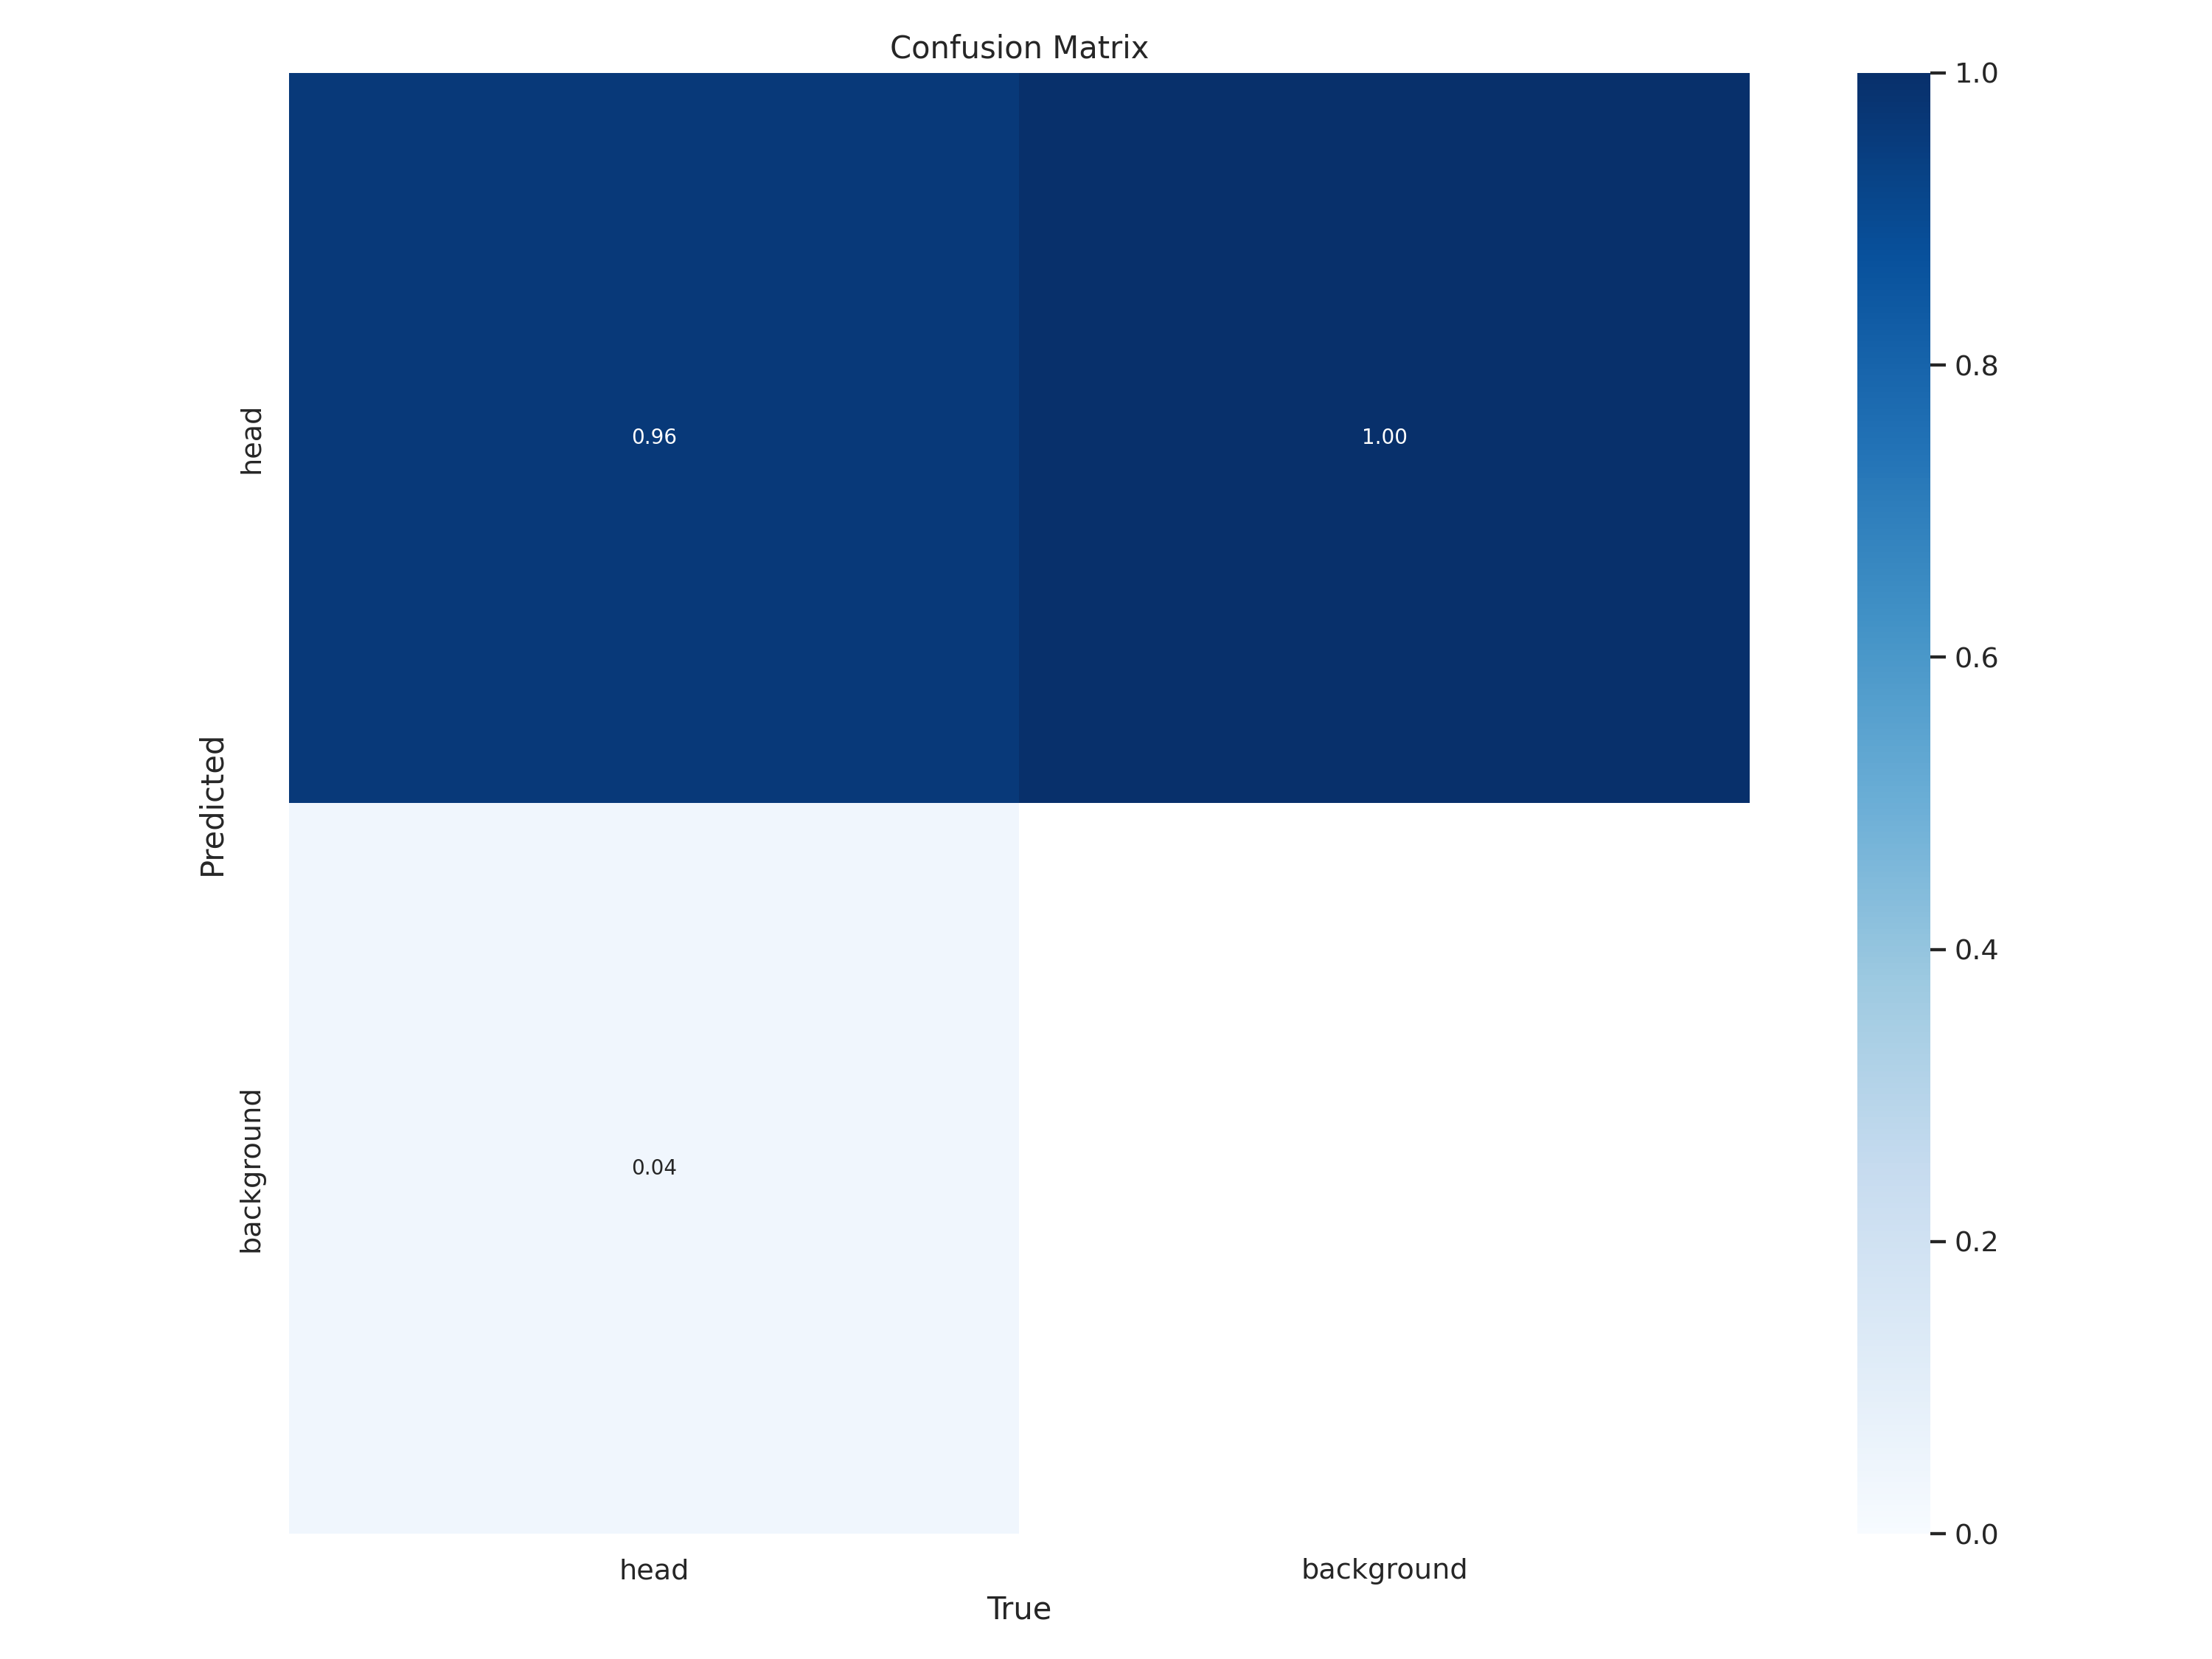

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=500)

/content


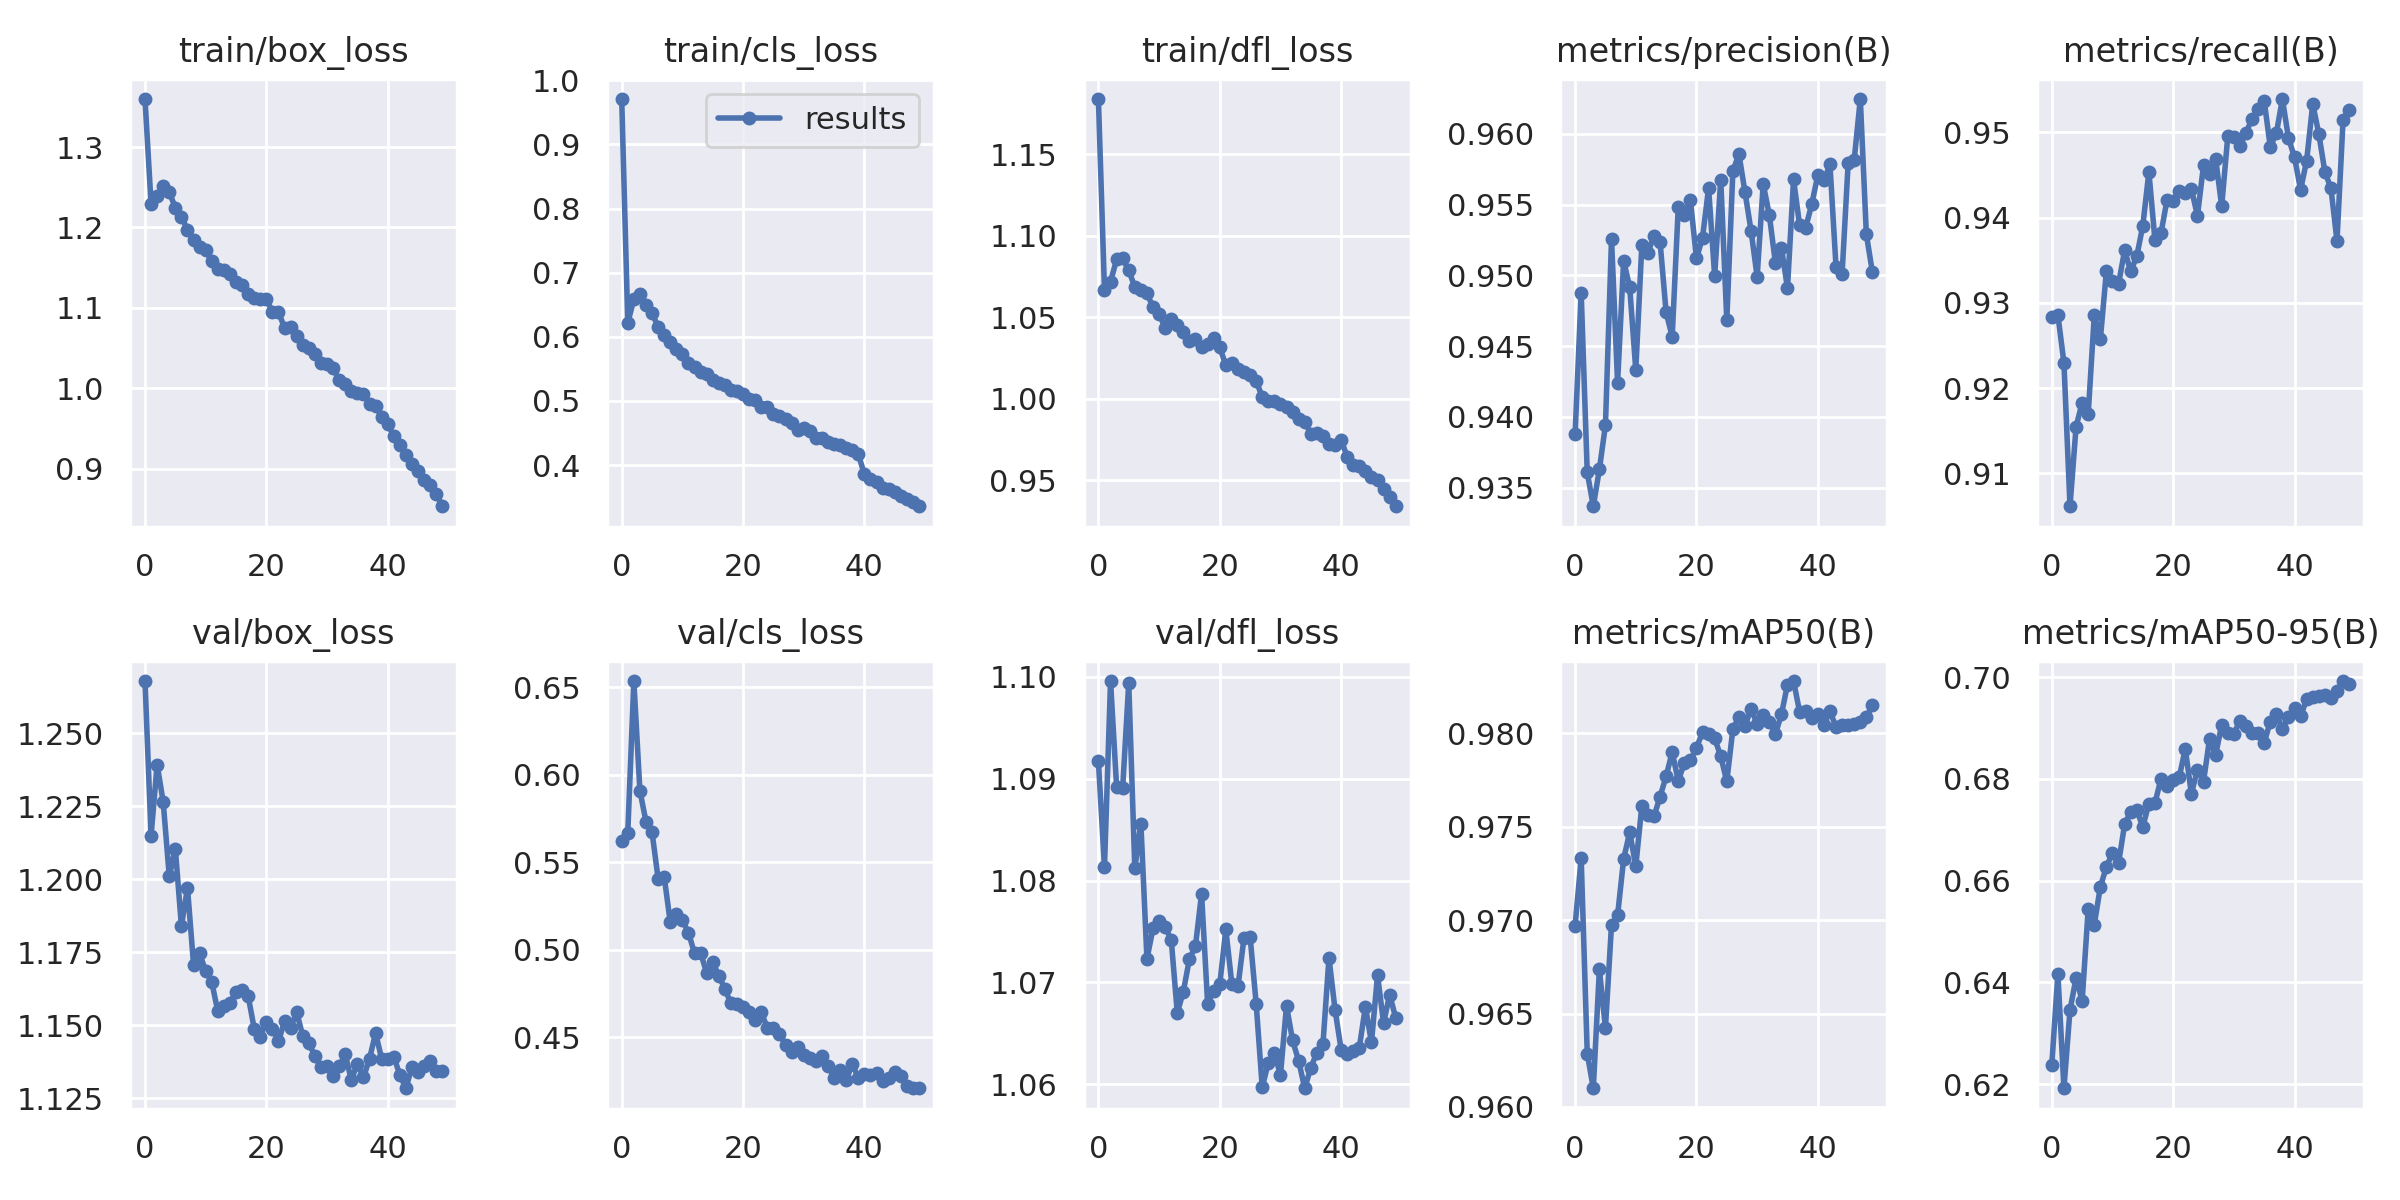

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=500)

/content


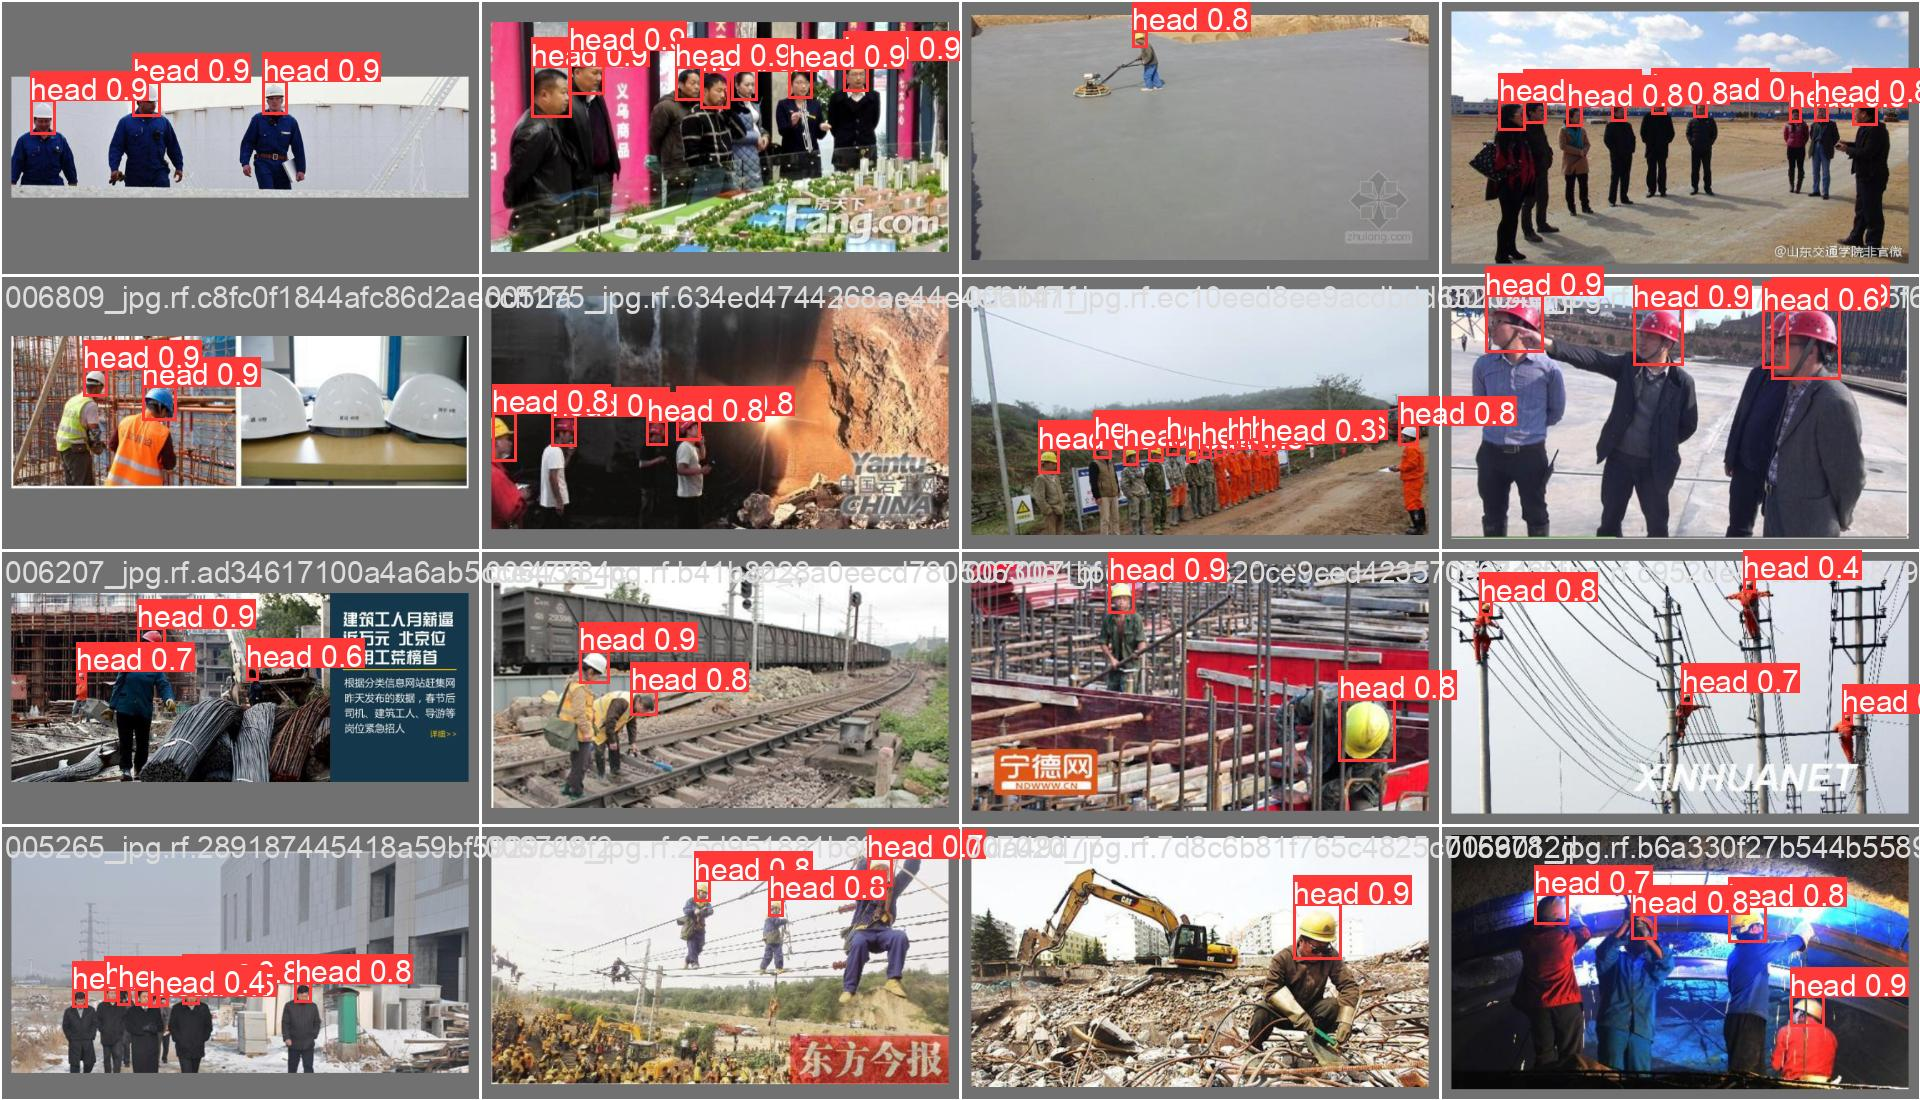

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=500)

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
2023-10-10 16:18:47.090891: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-10 16:18:48.297318: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
image 1/706 /content/datasets/Hard-Hat-Workers-14/test/images/005298_jpg.rf.d6fe5e5635be9509610a059a66e432d5.jpg: 448x640 8 heads, 97.5ms
image 2/706 /content/datasets/Hard-Hat-Workers-14/test/images/005299_jpg.rf.fb7c522d8fc48969a295a287032b53c1.jpg: 448x640 1 head, 12.9ms
image 3/706 /content/datasets/Hard-Hat-Workers-14/test/images/005300_jpg.rf.75d17868202e675bdb300b60b8cb2722.jpg

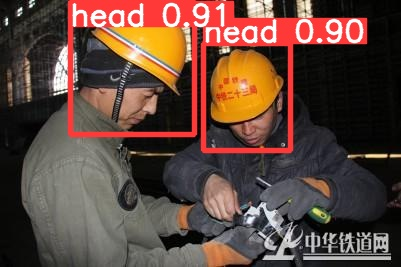

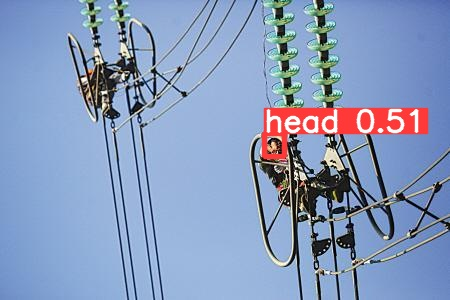

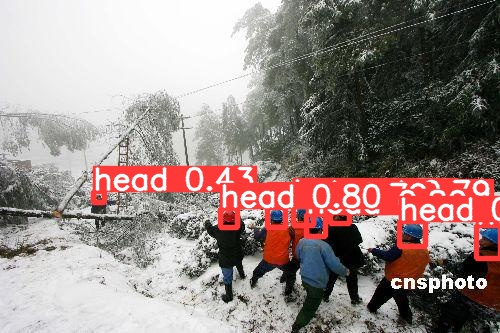

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
